In [58]:
import pandas as pd
import ast  # To safely evaluate strings containing Python expressions from a string-based input

# Read the main CSV file
df = pd.read_csv('scraped_data_food.csv')
df

,href,Sub Area,Name,Search Engine Rating,Sponsored,Opening Hours,Popular Times,Average Star Rating,Individual Star Rating,Reviews,Category,Price Rating,Address,Metadata,Tags,About
0,https://www.google.com/maps/place/Wisma+Atria/...,Depot Road,Wisma Atria,1,Yes,"{'Sunday': [{'open': '10 am', 'close': '10 pm'...","{'Sunday': {'6 am': '0%', '7 am': '0%', '8 am'...",4.2,"{5: 3, 4: 2, 3: 1, 2: 125, 1: 97}",7425,Shopping mall,NAN,"435 Orchard Rd, Singapore 238877","['wismaonline.com', '6235 2103', '8R3M+F8 Sing...","{'food court': 158, 'branded': 66, 'ion orchar...","['In-store shopping', 'Wheelchair-accessible c..."
1,https://www.google.com/maps/place/Chee+Wei+Veg...,Upper Thomson,Chee Wei Vegetarian @ BLK 66 Toa Payoh Lorong 4,1,Yes,"{'Sunday': [{'open': '6 am', 'close': '2 pm'}]...","{'Sunday': {'5 am': '0%', '6 am': '55%', '7 am...",3.7,"{5: 13, 4: 15, 3: 7, 2: 3, 1: 5}",43,Vegetarian restaurant,NAN,"66 Lor 4 Toa Payoh, Singapore 310066","['9747 5776', '8VP2+2R Singapore', 'Send to yo...",{},"['Outdoor seating', 'Takeaway', 'Dine-in', 'Wh..."
2,https://www.google.com/maps/place/Baristart+Co...,Bukit Merah,Baristart Coffee Singapore (Wisma Atria),1,Yes,{},{},4.2,"{5: 23, 4: 9, 3: 2, 2: 2, 1: 3}",39,Cafe,NAN,"435 Orchard Rd, #04-01 Wisma Atria, Singapore ...","['Opens soon ⋅ 11\u202fam', 'Place an order', ...","{'cream puff': 11, 'books': 6, 'pasta': 5, 'la...","['Delivery', 'Takeaway', 'Dine-in', 'Wheelchai..."
3,https://www.google.com/maps/place/JUMBO+Seafoo...,Alexandra North,JUMBO Seafood - Dempsey Hill,1,Yes,"{'Sunday': [{'open': '11:30 am', 'close': '2:3...","{'Sunday': {'6 am': '0%', '7 am': '0%', '8 am'...",4.4,"{5: 1, 4: 772, 3: 200, 2: 64, 1: 66}",2539,Seafood restaurant,Expensive,"11 Dempsey Rd, #01-16, Singapore 249673","['Floor 1 · Dempsey Hill', 'Find a table', 'Pl...","{'chilli crab': 292, 'black pepper crab': 86, ...","['Outdoor seating', 'Takeaway', 'Dine-in', 'Wh..."
4,https://www.google.com/maps/place/Zorba+The+Gr...,Bukit Ho Swee,Zorba The Greek Taverna,1,Yes,{},"{'Sunday': {'6 am': '0%', '7 am': '0%', '8 am'...",4.4,"{5: 1, 4: 267, 3: 87, 2: 55, 1: 73}",1497,Greek restaurant,NAN,"3A River Valley Road, Clarke Quay, Block A ORA...","['Floor 1 · Clarke Quay', 'Open ⋅ Closes 11\u2...","{'river': 103, 'nod': 24, 'beef souvlaki': 20,...","['Outdoor seating', 'Delivery', 'Takeaway', 'D..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14751,https://www.google.com/maps/place/McDonald%27s...,Bukit Batok West,McDonald's Bukit Batok West,49,No,"{'Sunday': [{'open': '6 am', 'close': '12 am'}...","{'Sunday': {'5 am': '0%', '6 am': '19%', '7 am...",4.0,"{5: 454, 4: 328, 3: 153, 2: 35, 1: 80}",1050,Hamburger restaurant,Inexpensive,"Blk 152 Bukit Batok Street 11, #01-280, Singap...","['Floor 1 · Bukit Batok West Shopping Centre',...","{'breakfast': 10, 'clean': 10, 'sitting': 8, '...","['Outdoor seating', 'No-contact delivery', 'De..."
14752,https://www.google.com/maps/place/Gimee+Face+%...,Guilin,Gimee Face 给面子,18,No,{},{},2.4,"{5: 0, 4: 2, 3: 1, 2: 2, 1: 2}",7,Noodle shop,NAN,"371 Bukit Batok Street 31, Singapore 650371","['Place an order', '9Q52+Q7 Singapore', 'Send ...",{},"['Takeaway', 'Dine-in', 'Wheelchair-accessible..."
14753,https://www.google.com/maps/place/Cha+Cha+Cha+...,Brickworks,Cha Cha Cha Mexican Restaurant,47,No,{},"{'Sunday': {'6 am': '0%', '7 am': '0%', '8 am'...",4.0,"{5: 414, 4: 315, 3: 115, 2: 51, 1: 53}",948,Mexican restaurant,Moderate,"32 Lor Mambong, Singapore 277690","['Open ⋅ Closes 11\u202fpm', 'Place an order',...","{'margaritas': 61, 'chimichanga': 34, 'happy h...","['Outdoor seating', 'No-contact delivery', 'De..."
14754,https://www.google.com/maps/place/iO+Italian+O...,Bukit Batok East,iO Italian Osteria,107,No,"{'Sunday': [{'open': '10 am', 'close': '10 pm'...","{'Sunday': {'6 am': '0%', '7 am': '0%', '8 am'...",4.5,"{5: 2, 4: 761, 3: 177, 2: 62, 1: 77}",3215,Italian restaurant,Moderate,"4 Hillview Rise, #02 - 01, Singapore 667979","['Floor 1 · HillV2', 'Find a table', '

In [59]:
# Get total number of Sub Areas
total_sub_areas = df['Sub Area'].nunique()
print("Total number of Sub Areas: ", total_sub_areas)

# Get percentage of Restaurants which are sponsored. Sponsored restaurants are the ones which have a value of "Yes" in the Sponsored column
total_sponsored = df['Sponsored'].value_counts()['Yes']
total_restaurants = df['Sponsored'].count()
percentage_sponsored = (total_sponsored / total_restaurants) * 100
# print 2 decimal places
print("Percentage of Restaurants which are sponsored: {:.2f}%".format(percentage_sponsored))


Total number of Sub Areas:  190
Percentage of Restaurants which are sponsored: 1.84%


In [60]:

# Get restaurants with the same name
restaurant_counts = df['Name'].value_counts()
print("Restaurants with the same name: \n", restaurant_counts)

Restaurants with the same name: 
 Name
Subway                                           70
Old Chang Kee                                    44
Cappadocia Turkish & Mediterranean Restaurant    35
Stuff'd                                          29
Sanook Kitchen                                   28
                                                 ..
COLLIN'S® Shaw Plaza                              1
Privé Somerset                                    1
UYA 炭焼活鰻料理 (Novena)                               1
Sukiya Gyudon • Curry (313@somerset)              1
金味饭庄 Mixed Vegetable Rice                         1
Name: count, Length: 8361, dtype: int64


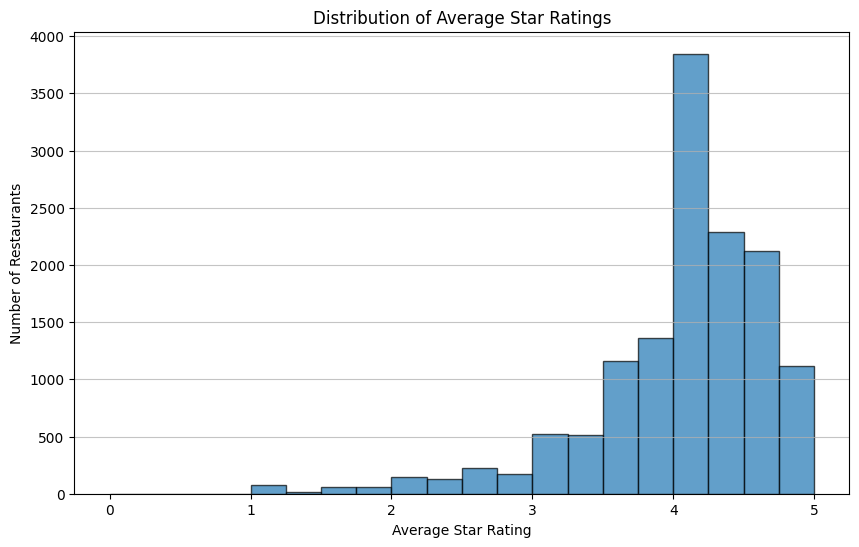

In [61]:
import matplotlib.pyplot as plt
import numpy as np
# Convert "NAN" to actual NaN and change dtype to float
df['Average Star Rating'] = pd.to_numeric(df['Average Star Rating'], errors='coerce')

# Drop NaN values for the plot (or you can fill them with a value like 0 or the mean)
df = df.dropna()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.hist(df['Average Star Rating'], bins=np.arange(0, 5.1, 0.25), edgecolor='k', alpha=0.7)
plt.title('Distribution of Average Star Ratings')
plt.xlabel('Average Star Rating')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', alpha=0.75)

plt.show()

In [62]:
# Get average opening hours of all restaurants
from datetime import datetime
from dateutil import parser

def calculate_hours(open_close_times):
    open_close_times['open'] = open_close_times['open'].replace(". Hide open hours for the week", "").strip()
    open_close_times['close'] = open_close_times['close'].replace(". Hide open hours for the week", "").strip()
    if open_close_times['open'] == 'Closed' or (open_close_times['open'] == '12 am' and open_close_times['close'] == '12 am'):
        return 24 if open_close_times['open'] == '12 am' else 0
    else:
        # if open close times does not have a am or pm
        if 'am' not in open_close_times['open'] and 'pm' not in open_close_times['open']:
            open_close_times['open'] = open_close_times['open'] + ' pm'
        # format for parsing example: 12 pm or 11:30 am
        fmt = '%I %p'
        fmt2 = '%I:%M %p'
        try:
            open_time = datetime.strptime(open_close_times['open'], fmt)
        except:
            open_time = datetime.strptime(open_close_times['open'], fmt2)
        try:
            close_time = datetime.strptime(open_close_times['close'], fmt)
        except:
            close_time = datetime.strptime(open_close_times['close'], fmt2)
        delta = close_time - open_time
        return delta.seconds / 3600  # Convert seconds to hours

# Extracting and Parsing the "Opening Hours" Data
df.loc[:, 'Opening Hours'] = df['Opening Hours'].apply(ast.literal_eval)

# Calculating Daily Opening Hours
total_hours = 0
count = 0
for index, row in df.iterrows():
    if not row['Opening Hours']:  # Check if 'Opening Hours' is empty
        continue  # Skip this row
    for day, times in row['Opening Hours'].items():
        for time_range in times:
            hours = calculate_hours(time_range)
            total_hours += hours
            count += 1

# Calculating the Average Opening Hours
average_hours = total_hours / count if count else 0

# print average opening hours to 2 decimal places
print("Average Opening Hours: {:.2f}".format(average_hours))

Average Opening Hours: 9.04


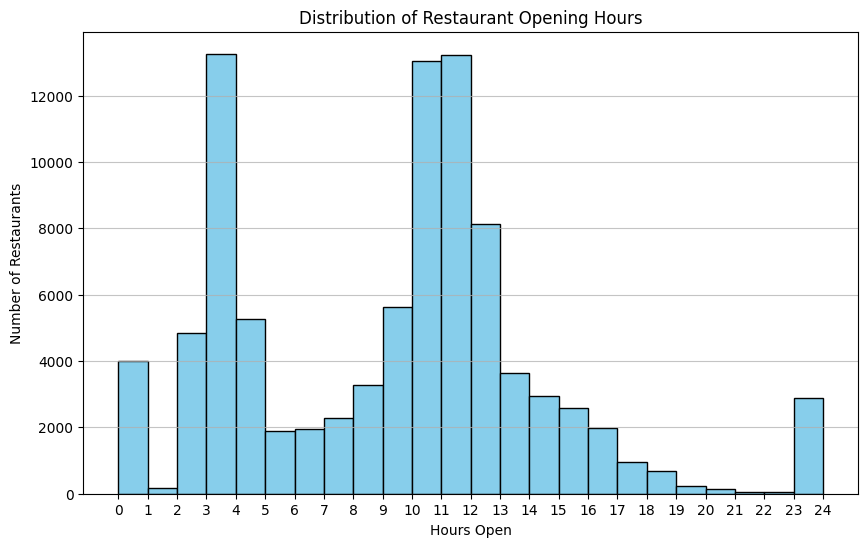

In [63]:
# Assuming you have a list of all hours calculated for each day of operation for all restaurants
# If you don't already have this, create it while calculating total and average hours
all_hours = []
for index, row in df.iterrows():
    if not row['Opening Hours']:  # Check if 'Opening Hours' is empty
        continue  # Skip this row
    for day, times in row['Opening Hours'].items():
        for time_range in times:
            hours = calculate_hours(time_range)
            all_hours.append(hours)  # Add each day's hours to the list

# Now, plot the histogram
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.hist(all_hours, bins=24, color='skyblue', edgecolor='black')  # 24 bins for each hour of the day
plt.title('Distribution of Restaurant Opening Hours')
plt.xlabel('Hours Open')
plt.ylabel('Number of Restaurants')
plt.xticks(range(0, 25))  # Mark each hour on the x-axis
plt.grid(axis='y', alpha=0.75)

plt.show()

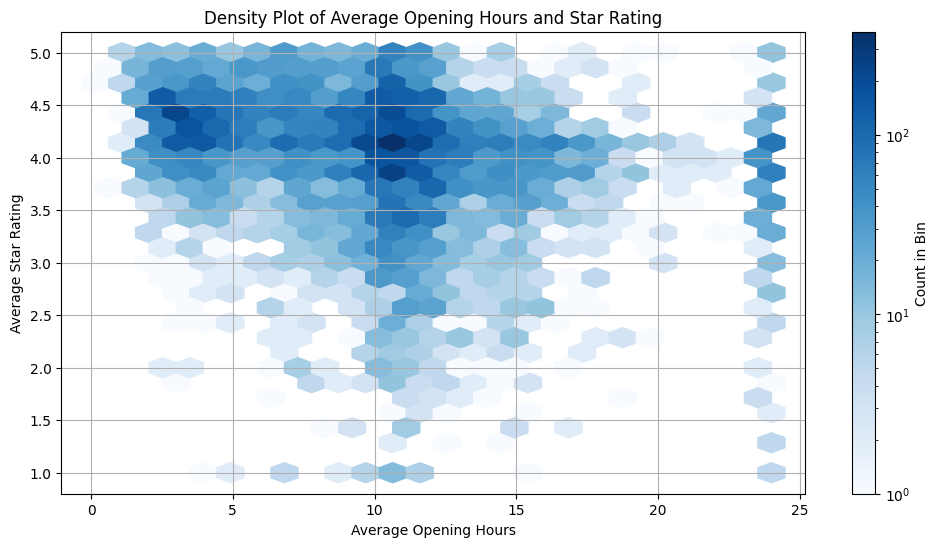

In [64]:
# Adjust the method to calculate average opening hours per restaurant
def calculate_average_hours(opening_hours):
    # Check if opening_hours is a string and convert it to a dictionary
    if isinstance(opening_hours, str):
        opening_hours = ast.literal_eval(opening_hours)

    total_hours = 0
    count = 0
    for day, times in opening_hours.items():
        for time_range in times:
            hours = calculate_hours(time_range)
            total_hours += hours
            count += 1
    return total_hours / count if count else 0

df_copy = df.copy()  # Make a copy of the DataFrame to preserve the original
# Apply the calculation to each row in the DataFrame
df_copy.loc[:, 'Average Opening Hours'] = df['Opening Hours'].apply(calculate_average_hours)

# Drop rows with average opening hours of 0
df = df_copy[df_copy['Average Opening Hours'] != 0]

# Convert "Average Star Rating" to numeric and drop NaN values
df.loc[:, 'Average Star Rating'] = pd.to_numeric(df['Average Star Rating'], errors='coerce')
df = df.dropna(subset=['Average Opening Hours', 'Average Star Rating'])

# Plotting the hexbin plot
plt.figure(figsize=(12, 6))
plt.hexbin(df['Average Opening Hours'], df['Average Star Rating'], gridsize=25, cmap='Blues', bins='log')
plt.colorbar(label='Count in Bin')
plt.title('Density Plot of Average Opening Hours and Star Rating')
plt.xlabel('Average Opening Hours')
plt.ylabel('Average Star Rating')
plt.grid(True)
plt.show()

# Machine Learning - Linear Regression

Looking at the above graph which plots the relationship between the `Average Star Rating` and the `Average Opening Hours` of a restaurant, we can't really see the relationship between the two or how it correlates.

This is where we can use a linear regression model which can help us identify the linear relationship between the two features.


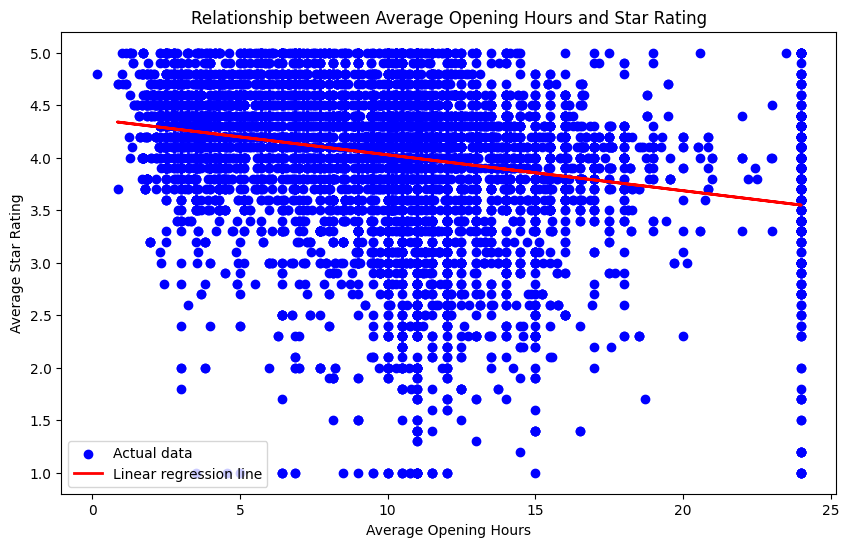

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame and it's already prepared with 'Average Opening Hours' and 'Average Star Rating'

# Step 3: Split data into training and testing sets
X = df[['Average Opening Hours']]  # Independent variable
y = df['Average Star Rating']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Perform linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Step 5: Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')  # Actual data points
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear regression line')  # Regression line
plt.title('Relationship between Average Opening Hours and Star Rating')
plt.xlabel('Average Opening Hours')
plt.ylabel('Average Star Rating')
plt.legend()
plt.show()

The observation that the average star rating of restaurants decreases as their average number of hours open increases can be attributed to several factors and interpretations based on linear regression principles and the understanding of business operations.

1. **Linear Regression Interpretation**: In linear regression, the relationship between two variables is represented by a line, where one variable is independent (explanatory) and the other is dependent (response). The slope of the regression line indicates the direction and strength of the relationship. A negative slope, as in your case, suggests that as the independent variable (average number of hours a restaurant is open) increases, the dependent variable (average star rating) tends to decrease.

2. **Business Operations Insight**: The negative relationship might reflect operational challenges associated with longer hours. Restaurants open for more extended hours might struggle to maintain consistent quality, leading to lower customer satisfaction and hence lower ratings. It's possible that extended hours strain staff, affect food quality, or diminish the dining experience due to higher customer volume or operational fatigue.

3. **Customer Expectation and Experience**: Longer hours might also attract a different customer base with different expectations. Late hours could mean a shift towards convenience dining, where customers might prioritize availability over quality, leading to lower ratings. Alternatively, the expectation for quality might not decrease with the hour, leading to disappointment and lower ratings when the experience doesn't match daytime standards.

4. **Statistical Significance and Practical Significance**: While the linear regression might show a statistically significant relationship between hours open and star rating, it's crucial to consider the practical significance. The actual impact (slope value) of additional open hours on star ratings might be small, suggesting that while the trend is statistically valid, the practical effect on business might be minimal. This distinction helps in deciding whether operational adjustments are warranted.

5. **Correlation Does Not Imply Causation**: It's important to remember that correlation does not imply causation. The observed relationship does not prove that longer hours cause lower ratings. Other lurking variables or confounding factors, such as location, type of cuisine, or management practices, might influence both the hours of operation and the ratings. For a more accurate understanding, further investigation into these factors is necessary.

6. **Operational Recommendations**: Based on the regression analysis, restaurant owners might consider evaluating the cost-benefit of extended hours. If the decrease in ratings significantly impacts customer traffic and revenue, adjusting operating hours could be beneficial. Alternatively, focusing on improving quality and customer service during extended hours might mitigate the negative impact on ratings.

In conclusion, the observed negative relationship between restaurant operating hours and average star ratings suggests potential operational challenges and shifting customer expectations. However, decisions should consider the practical significance of the relationship and potential confounding factors to ensure they align with business goals and customer satisfaction.
